In [ ]:
import os
import numpy as np
import pandas as pd
from TSB_UAD.models.feature import Window
from TSB_UAD.utils.slidingWindows import find_length
from TSB_UAD.utils.visualisation import plotFig
from TSB_UAD.models.distance import Fourier
from TSB_UAD.vus.metrics import get_metrics
from TSB_UAD.models.lstm import lstm
from sklearn.preprocessing import MinMaxScaler
import math
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

2025-06-10 22:55:54.528069: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749585354.548310  279398 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749585354.554834  279398 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749585354.569889  279398 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749585354.569940  279398 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749585354.569946  279398 computation_placer.cc:177] computation placer alr

In [2]:
# Read data -- create/read a normality-2 dataset named `combined.csv`
# filepath = "data/TSB-UAD-Public/ECG/MBA_ECG14046_data_9.out"
ts1 = "../TSB-UAD-Public/Occupancy/room-occupancy.train.csv@5.out"
ts2 = "../TSB-UAD-Public/YAHOO/YahooA3Benchmark-TS1_data.out"
ts3 = "../TSB-UAD-Public/NASA-MSL/T-5.train.out"

# Normality 1
filepath_1 = 'normality-1.csv'
name_1 = filepath_1.split('/')[-1]
if not os.path.exists(filepath_1):
    df1 = pd.read_csv(ts1, header=None).dropna().to_numpy()
    pd.DataFrame(df1).to_csv(filepath_1, header=False, index=False)

df_1 = pd.read_csv(filepath_1, header=None).dropna().to_numpy()
data_1 = df_1[:, 0].astype(float)
labels_1 = df_1[:, 1].astype(int)

# Normality 2
filepath_2 = 'normality-2.csv'
name_2 = filepath_2.split('/')[-1]
if not os.path.exists(filepath_2):
    df1 = pd.read_csv(ts1, header=None).dropna().to_numpy()
    df2 = pd.read_csv(ts2, header=None).dropna().to_numpy()
    combined = np.vstack((df1, df2))
    pd.DataFrame(combined).to_csv(filepath_2, header=False, index=False)

df_2 = pd.read_csv(filepath_2, header=None).dropna().to_numpy()
data_2 = df_2[:, 0].astype(float)
labels_2 = df_2[:, 1].astype(int)

# Normality 3
filepath_3 = 'normality-3.csv'
name_3 = filepath_2.split('/')[-1]
if not os.path.exists(filepath_3):
    df1 = pd.read_csv(ts1, header=None).dropna().to_numpy()
    df2 = pd.read_csv(ts2, header=None).dropna().to_numpy()
    df3 = pd.read_csv(ts3, header=None).dropna().to_numpy()
    combined = np.vstack((df1, df2, df3))
    pd.DataFrame(combined).to_csv(filepath_3, header=False, index=False)

df_3 = pd.read_csv(filepath_3, header=None).dropna().to_numpy()
data_3 = df_3[:, 0].astype(float)
labels_3 = df_3[:, 1].astype(int)

In [ ]:
def evaluate(score, data, label, modelName, slidingWindow, name, predict=True):
    # post processing
    score = (
        MinMaxScaler(feature_range=(0, 1)).fit_transform(score.reshape(-1, 1)).ravel()
    )

    if predict:
        score = np.array(
            [score[0]] * math.ceil((slidingWindow - 1) / 2)
            + list(score)
            + [score[-1]] * ((slidingWindow - 1) // 2)
        )
    results = metrics.get_metrics(
        score, label, metric="all", slidingWindow=slidingWindow
    )
    for metric in results.keys():
        print(metric, ":", results[metric])

    plotFig(
        data,
        label,
        score,
        slidingWindow,
        fileName=name,
        modelName=modelName,
    )

# Normality 1

In [4]:
# Preprocessing
# slidingWindow = 10 # user defined

# or auto sliding window length
slidingWindow = find_length(data_1)
# X_data = Window(window=slidingWindow).convert(data_1).to_numpy()

print("Estimated Subsequence length: ",slidingWindow)
print("Time series length: ",len(data_1))
print("Number of abnormal points: ",list(labels_1).count(1))

Estimated Subsequence length:  100
Time series length:  8143
Number of abnormal points:  1729


In [5]:
modelName='LSTM' 
clf = lstm(slidingwindow = slidingWindow, predict_time_steps=1, epochs = 50, patience = 5, verbose=1)
clf.fit(data_1)
measure = Fourier()
measure.detector = clf
measure.set_param()
clf.decision_function(measure=measure)
        
score = clf.decision_scores_

(691,)
X=<tf.Tensor: shape=(691,), dtype=float32, numpy=
array([0.00479299, 0.00478344, 0.00477946, 0.00477151, 0.00475699,
       0.00475699, 0.00475699, 0.00475699, 0.00475699, 0.00474535,
       0.00474095, 0.00473937, 0.00475112, 0.00473373, 0.00471494,
       0.00471494, 0.00472808, 0.00472795, 0.00474541, 0.00472951,
       0.00472951, 0.00472951, 0.00473908, 0.00474865, 0.00474865,
       0.00471022, 0.00471974, 0.00471974, 0.00471974, 0.00470678,
       0.00468754, 0.00469385, 0.00469385, 0.00467171, 0.00471105,
       0.0046527 , 0.00464643, 0.00464074, 0.00465583, 0.0046527 ,
       0.00465583, 0.00465583, 0.00464643, 0.00460676, 0.00462743,
       0.00463677, 0.00462743, 0.00457021, 0.00463677, 0.00457865,
       0.00458146, 0.00460564, 0.00460564, 0.00460564, 0.00458708,
       0.00460564, 0.00457305, 0.00459945, 0.00458708, 0.00455906,
       0.00457305, 0.00455906, 0.00458708, 0.00455906, 0.00455347,
       0.00455067, 0.00455906, 0.00455067, 0.00455067, 0.00455906,
     

I0000 00:00:1749585357.155491  279398 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5424 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6


(123,)
X=<tf.Tensor: shape=(123,), dtype=float32, numpy=
array([0.00358485, 0.00358485, 0.00358485, 0.00358485, 0.00358485,
       0.00359299, 0.00358485, 0.00358485, 0.00359706, 0.00358485,
       0.00358485, 0.00358485, 0.00358485, 0.00357641, 0.00357641,
       0.00356797, 0.00357641, 0.00358485, 0.00358485, 0.00357641,
       0.00358485, 0.00358485, 0.00358485, 0.00358485, 0.0035736 ,
       0.00357641, 0.00356797, 0.00357641, 0.00356797, 0.00355771,
       0.00356797, 0.0035493 , 0.00356797, 0.00356797, 0.00356797,
       0.0035493 , 0.00356797, 0.0035603 , 0.00354752, 0.0035603 ,
       0.00354072, 0.00355263, 0.00355263, 0.00355263, 0.00355263,
       0.00353477, 0.00355263, 0.00355263, 0.00355263, 0.00353882,
       0.00353882, 0.00353882, 0.00353882, 0.00353882, 0.00353115,
       0.00353115, 0.00350877, 0.00352348, 0.00352348, 0.00352348,
       0.00351112, 0.00352348, 0.00352348, 0.00352348, 0.00352348,
       0.00352348, 0.00352348, 0.00352348, 0.00352348, 0.00352348,
     

/home/periklis/Documents/University DWS 2024-2025/semester-2/MMDS/TSB-UAD/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50


I0000 00:00:1749585361.181274  279735 cuda_dnn.cc:529] Loaded cuDNN version 90300


      9/Unknown 3s 14ms/step - loss: 0.0044 

2025-06-10 22:56:01.674699: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-06-10 22:56:01.674790: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_8]]
/home/periklis/Documents/University DWS 2024-2025/semester-2/MMDS/TSB-UAD/.venv/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 0.0050 - val_loss: 0.0060
Epoch 2/50
 4/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0047

2025-06-10 22:56:02.422153: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/sequential_1/lstm_1/Shape/_2]]
2025-06-10 22:56:02.422182: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:02.422188: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:02.422194: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 5749362782892782736


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0063 - val_loss: 0.0014
Epoch 3/50
 3/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0012

2025-06-10 22:56:02.768013: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:02.768054: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:02.805288: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/sequential_1/lstm_1/Shape/_2]]
2025-06-10 22:56:02.805348: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:02.805356: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:02.805364: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 5749362782892782736


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0043 - val_loss: 0.0021
Epoch 4/50
 8/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0035

2025-06-10 22:56:03.121571: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:03.121609: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:03.121626: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 5749362782892782736


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0040 - val_loss: 0.0021
Epoch 5/50
 4/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0017

2025-06-10 22:56:03.331795: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:03.331823: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:03.331828: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2194355617884629779
2025-06-10 22:56:03.331831: I tensorflow/core/framework/local_rendezvous.cc:430] Local rendezvous send item cancelled. Key hash: 13861674918609521371
2025-06-10 22:56:03.331835: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16153522082516500413
2025-06-10 22:56:03.369817: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:03.369842: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0039 - val_loss: 0.0014
Epoch 6/50
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0017    

2025-06-10 22:56:03.587256: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-06-10 22:56:03.587456: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:03.587474: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:03.587480: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16153522082516500413
2025-06-10 22:56:03.622694: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:03.622735: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:03.622742: I tensorflow/core/framework/local_rendez

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034 - val_loss: 0.0016
Epoch 7/50
 2/10 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0011 

2025-06-10 22:56:03.935180: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:03.935204: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:03.935219: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 5749362782892782736


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0034 - val_loss: 0.0014
Epoch 8/50


2025-06-10 22:56:04.397372: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:04.397393: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:04.397398: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 5749362782892782736


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0032 - val_loss: 0.0016
Epoch 9/50
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0011

2025-06-10 22:56:04.802469: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:04.802498: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:04.802526: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 5749362782892782736


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0032 - val_loss: 0.0016
Epoch 10/50
 4/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0014

2025-06-10 22:56:05.154137: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_8]]
2025-06-10 22:56:05.193345: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:05.193391: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:05.193429: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 5749362782892782736


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0032 - val_loss: 0.0016
Epoch 11/50
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0017

2025-06-10 22:56:05.408654: I tensorflow/core/framework/local_rendezvous.cc:430] Local rendezvous send item cancelled. Key hash: 17606536135134889880
2025-06-10 22:56:05.408686: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:05.408694: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:05.408700: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2194355617884629779
2025-06-10 22:56:05.408705: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16153522082516500413
2025-06-10 22:56:05.444190: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:05.444220: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032 - val_loss: 0.0015
Epoch 12/50
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0011

2025-06-10 22:56:05.636091: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:05.636118: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:05.636126: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16153522082516500413
2025-06-10 22:56:05.762570: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:05.762605: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:05.762619: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 5749362782892782736


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0031 - val_loss: 0.0015
Epoch 12: early stopping
(8143,)
X=<tf.Tensor: shape=(8143,), dtype=float32, numpy=
array([0.00479299, 0.00478344, 0.00477946, ..., 0.00559564, 0.00562145,
       0.00561206], dtype=float32)>
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


AUC_ROC : 0.7306083623103957
AUC_PR : 0.39911165485608874
Precision : 0.625
Recall : 0.01156737998843262
F : 0.022714366837024418
Precision_at_k : 0.01156737998843262
Rprecision : 0.36764705882352944
Rrecall : 0.06654252290599472
RF : 0.11268885234711183
R_AUC_ROC : 0.5980797878641811
R_AUC_PR : 0.3959132594794319
VUS_ROC : 0.6329679522453526
VUS_PR : 0.39377695430234294
Affiliation_Precision : 0.7592343034295927
Affiliation_Recall : 0.43371953168171895


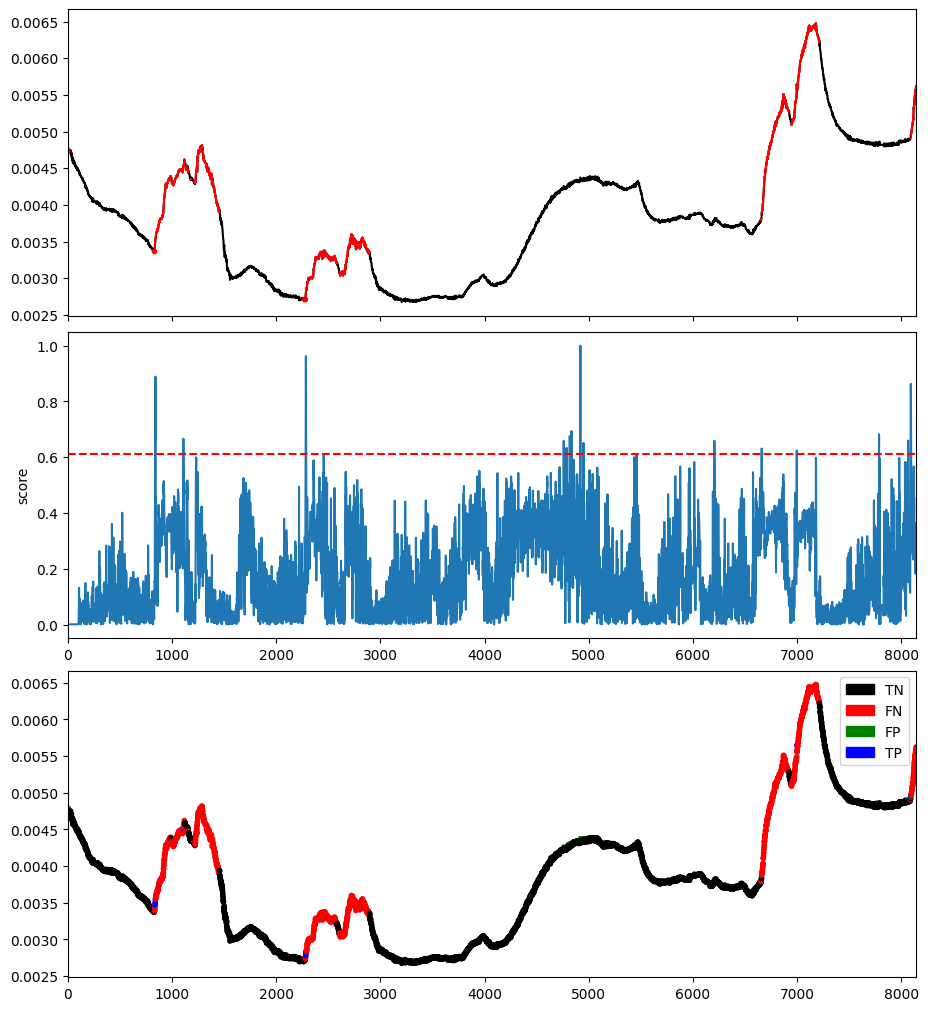

In [6]:
evaluate(score, data_1, labels_1, None, slidingWindow, None, predict=False)

# Normality 2

In [7]:
# Preprocessing
# slidingWindow = 10 # user defined

# or auto sliding window length
slidingWindow = find_length(data_2)
# X_data = Window(window=slidingWindow).convert(data_2).to_numpy()

print("Estimated Subsequence length: ",slidingWindow)
print("Time series length: ",len(data_2))
print("Number of abnormal points: ",list(labels_2).count(1))

Estimated Subsequence length:  24
Time series length:  9823
Number of abnormal points:  1740


In [8]:
modelName='LSTM' 
clf = lstm(slidingwindow = slidingWindow, predict_time_steps=1, epochs = 50, patience = 5, verbose=1)
clf.fit(data_2)
measure = Fourier()
measure.detector = clf
measure.set_param()
clf.decision_function(measure=measure)
        
score = clf.decision_scores_

(834,)
X=<tf.Tensor: shape=(834,), dtype=float32, numpy=
array([0.00479299, 0.00478344, 0.00477946, 0.00477151, 0.00475699,
       0.00475699, 0.00475699, 0.00475699, 0.00475699, 0.00474535,
       0.00474095, 0.00473937, 0.00475112, 0.00473373, 0.00471494,
       0.00471494, 0.00472808, 0.00472795, 0.00474541, 0.00472951,
       0.00472951, 0.00472951, 0.00473908, 0.00474865, 0.00474865,
       0.00471022, 0.00471974, 0.00471974, 0.00471974, 0.00470678,
       0.00468754, 0.00469385, 0.00469385, 0.00467171, 0.00471105,
       0.0046527 , 0.00464643, 0.00464074, 0.00465583, 0.0046527 ,
       0.00465583, 0.00465583, 0.00464643, 0.00460676, 0.00462743,
       0.00463677, 0.00462743, 0.00457021, 0.00463677, 0.00457865,
       0.00458146, 0.00460564, 0.00460564, 0.00460564, 0.00458708,
       0.00460564, 0.00457305, 0.00459945, 0.00458708, 0.00455906,
       0.00457305, 0.00455906, 0.00458708, 0.00455906, 0.00455347,
       0.00455067, 0.00455906, 0.00455067, 0.00455067, 0.00455906,
     

/home/periklis/Documents/University DWS 2024-2025/semester-2/MMDS/TSB-UAD/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


     11/Unknown 2s 17ms/step - loss: 0.0115

/home/periklis/Documents/University DWS 2024-2025/semester-2/MMDS/TSB-UAD/.venv/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0115 - val_loss: 0.5036
Epoch 2/50


2025-06-10 22:56:17.302157: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 15394367852804645279
2025-06-10 22:56:17.302179: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:17.302191: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0102 - val_loss: 0.5527
Epoch 3/50
11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0089

2025-06-10 22:56:18.165656: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 15394367852804645279
2025-06-10 22:56:18.165679: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:18.165687: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:18.361662: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:18.361687: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:18.361693: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2194355617884629779
2025-06-10 22:56:18.361699: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0088 - val_loss: 0.5264
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0087 - val_loss: 0.5024
Epoch 5/50
10/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0086

2025-06-10 22:56:18.695960: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 15394367852804645279
2025-06-10 22:56:18.695996: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:18.696010: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0085 - val_loss: 0.4639
Epoch 6/50
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0111

2025-06-10 22:56:18.918956: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/gradient_tape/compile_loss/mse/sub/Shape/_10]]
2025-06-10 22:56:18.918998: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:18.919005: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:18.919011: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2194355617884629779
2025-06-10 22:56:18.919017: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 10238745183387847233
2025-06-10 22:56:19.020829: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 153943678528046

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0083 - val_loss: 0.4122
Epoch 7/50
10/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0084

2025-06-10 22:56:19.330558: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 15394367852804645279
2025-06-10 22:56:19.330578: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:19.330798: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0082 - val_loss: 0.3562
Epoch 8/50
 6/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0084

2025-06-10 22:56:19.579208: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 15394367852804645279
2025-06-10 22:56:19.579233: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:19.579240: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0082

2025-06-10 22:56:19.944819: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:19.944843: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:19.944849: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2194355617884629779
2025-06-10 22:56:19.944853: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 10238745183387847233


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0082 - val_loss: 0.3134
Epoch 9/50


2025-06-10 22:56:20.226019: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 15394367852804645279
2025-06-10 22:56:20.226039: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:20.226045: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0082 - val_loss: 0.2913
Epoch 10/50
 5/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0088

2025-06-10 22:56:21.102130: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:21.102157: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:21.102164: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2194355617884629779
2025-06-10 22:56:21.102170: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 10238745183387847233


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0082 - val_loss: 0.2856
Epoch 11/50


2025-06-10 22:56:21.492433: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 15394367852804645279
2025-06-10 22:56:21.492459: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:21.492466: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0081 - val_loss: 0.2875
Epoch 12/50
 8/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0085

2025-06-10 22:56:22.097418: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 15394367852804645279
2025-06-10 22:56:22.097441: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:22.097449: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0081 - val_loss: 0.2901
Epoch 13/50
10/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0083

2025-06-10 22:56:22.401523: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 15394367852804645279
2025-06-10 22:56:22.401550: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:22.401567: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0081 - val_loss: 0.2930
Epoch 14/50
 6/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0085 

2025-06-10 22:56:22.650648: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 15394367852804645279
2025-06-10 22:56:22.650672: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:22.650690: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0080 - val_loss: 0.2978
Epoch 15/50
 5/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0088

2025-06-10 22:56:22.912889: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:22.912913: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:22.912921: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2194355617884629779
2025-06-10 22:56:22.912948: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 10238745183387847233
2025-06-10 22:56:22.977200: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 15394367852804645279
2025-06-10 22:56:22.977230: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:22.977235: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0080 - val_loss: 0.3031
Epoch 15: early stopping
(9823,)
X=<tf.Tensor: shape=(9823,), dtype=float32, numpy=
array([ 4.7929883e-03,  4.7834408e-03,  4.7794636e-03, ...,
       -4.4156592e+03, -4.2427339e+03, -3.9836389e+03], dtype=float32)>


2025-06-10 22:56:23.191276: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:23.191314: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:23.191319: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2194355617884629779
2025-06-10 22:56:23.231124: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 15394367852804645279
2025-06-10 22:56:23.231144: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:23.231152: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221


154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


AUC_ROC : 0.7648687965803069
AUC_PR : 0.4138004511406687
Precision : 0.08333333333333333
Recall : 0.004022988505747126
F : 0.007675438596491228
Precision_at_k : 0.004022988505747126
Rprecision : 0.12962962962962962
Rrecall : 0.1938572961373391
RF : 0.1553673270701977
R_AUC_ROC : 0.8048733701626659
R_AUC_PR : 0.46814387281491954
VUS_ROC : 0.783838140433314
VUS_PR : 0.44246884394496433
Affiliation_Precision : 0.746832683548222
Affiliation_Recall : 0.6676353919403318


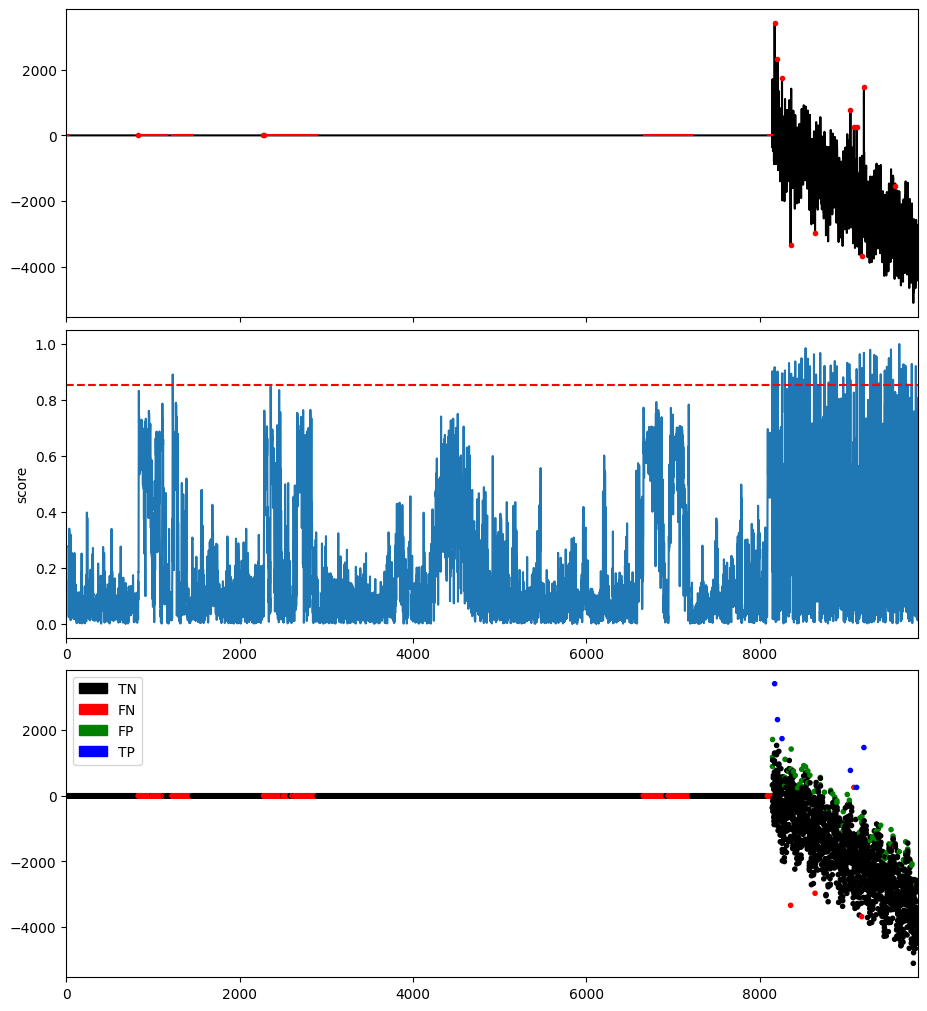

In [9]:
evaluate(score, data_2, labels_2, None, slidingWindow, None, predict=False)

# Normality 3

In [10]:
# Preprocessing
# slidingWindow = 10 # user defined

# or auto sliding window length
slidingWindow = find_length(data_3)
# X_data = Window(window=slidingWindow).convert(data_3).to_numpy()

print("Estimated Subsequence length: ",slidingWindow)
print("Time series length: ",len(data_3))
print("Number of abnormal points: ",list(labels_3).count(1))

Estimated Subsequence length:  24
Time series length:  12095
Number of abnormal points:  1740


In [11]:
modelName='LSTM' 
clf = lstm(slidingwindow = slidingWindow, predict_time_steps=1, epochs = 50, patience = 5, verbose=1)
clf.fit(data_3)
measure = Fourier()
measure.detector = clf
measure.set_param()
clf.decision_function(measure=measure)
        
score = clf.decision_scores_

(1027,)
X=<tf.Tensor: shape=(1027,), dtype=float32, numpy=
array([0.00479299, 0.00478344, 0.00477946, ..., 0.00430825, 0.00432282,
       0.00432976], dtype=float32)>
(182,)
X=<tf.Tensor: shape=(182,), dtype=float32, numpy=
array([0.00432976, 0.00433774, 0.0043438 , 0.00435877, 0.00435877,
       0.00435877, 0.00435877, 0.00436291, 0.00437534, 0.00437534,
       0.00437534, 0.00437534, 0.0043843 , 0.00437534, 0.00439552,
       0.00439552, 0.00439552, 0.00439552, 0.00440226, 0.00440226,
       0.00440226, 0.00440226, 0.00440226, 0.00438878, 0.00438878,
       0.00440226, 0.004408  , 0.00441893, 0.00442949, 0.00443597,
       0.00443393, 0.00444505, 0.00444836, 0.00445519, 0.0044506 ,
       0.00446436, 0.00446894, 0.00446894, 0.00446894, 0.00447311,
       0.00446894, 0.00446894, 0.00447728, 0.00446894, 0.00448005,
       0.00446894, 0.00448144, 0.00448561, 0.00448144, 0.00448005,
       0.00448561, 0.00447874, 0.00448561, 0.0044745 , 0.00446894,
       0.00447311, 0.00448561, 0.004485

/home/periklis/Documents/University DWS 2024-2025/semester-2/MMDS/TSB-UAD/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


     13/Unknown 2s 19ms/step - loss: 0.0127

/home/periklis/Documents/University DWS 2024-2025/semester-2/MMDS/TSB-UAD/.venv/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0276 - val_loss: 0.1069
Epoch 2/50
 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0396

2025-06-10 22:56:33.685290: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:33.685320: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:33.685327: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3596731473038029794


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0427 - val_loss: 0.0796
Epoch 3/50
 5/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0369

2025-06-10 22:56:33.928049: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:33.980611: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:33.980643: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:33.980651: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3596731473038029794


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0316 - val_loss: 0.0555
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0209 - val_loss: 0.0571
Epoch 5/50
 6/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0158

2025-06-10 22:56:34.565776: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:34.565802: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:34.565809: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2194355617884629779
2025-06-10 22:56:34.565832: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2411782860310245037
2025-06-10 22:56:34.617206: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:34.617235: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:34.617241: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv i

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0158 - val_loss: 0.0514
Epoch 6/50
 6/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0167

2025-06-10 22:56:34.865751: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:34.865791: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0160 - val_loss: 0.0386
Epoch 7/50
 5/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0214

2025-06-10 22:56:35.177542: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:35.177572: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:35.232526: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:35.232573: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:35.232602: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3596731473038029794


13/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0182

2025-06-10 22:56:35.560429: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:35.560451: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:35.560456: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2194355617884629779
2025-06-10 22:56:35.560460: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2411782860310245037


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0183 - val_loss: 0.0398
Epoch 8/50
 6/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0124

2025-06-10 22:56:35.910946: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-06-10 22:56:35.910977: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:35.910984: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:35.910998: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3596731473038029794


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0119 - val_loss: 0.0394
Epoch 9/50
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0185

2025-06-10 22:56:36.292497: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:36.292532: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:36.398105: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:36.398130: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:36.398143: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3596731473038029794


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0125 - val_loss: 0.0359
Epoch 10/50


2025-06-10 22:56:36.748224: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:36.748399: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:36.748410: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2194355617884629779
2025-06-10 22:56:36.748435: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2411782860310245037
2025-06-10 22:56:36.823944: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:36.823981: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:36.823995: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv i

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0120 - val_loss: 0.0325
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0147 - val_loss: 0.0344
Epoch 12/50
 5/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0123

2025-06-10 22:56:37.843869: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0148 - val_loss: 0.0331
Epoch 13/50
 3/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0138

2025-06-10 22:56:38.161790: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:38.212552: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:38.212580: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:38.212591: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3596731473038029794


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0139 - val_loss: 0.0319
Epoch 14/50


2025-06-10 22:56:38.587631: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:38.587659: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:38.642306: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:38.642343: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:38.642366: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3596731473038029794


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0135 - val_loss: 0.0298
Epoch 15/50
 5/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0121

2025-06-10 22:56:39.074371: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:39.074398: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:39.129981: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:39.130019: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:39.130035: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3596731473038029794


13/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0110

2025-06-10 22:56:39.402368: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:39.402398: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0119 - val_loss: 0.0298
Epoch 16/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0131 - val_loss: 0.0284
Epoch 17/50
 6/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0115

2025-06-10 22:56:40.038459: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:40.038484: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:40.105721: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:40.105756: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:40.105766: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3596731473038029794


12/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0108

2025-06-10 22:56:40.372010: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:40.372035: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0115 - val_loss: 0.0293
Epoch 18/50
 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0120

2025-06-10 22:56:40.774221: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:40.774246: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:40.774255: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3596731473038029794


12/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0113

2025-06-10 22:56:41.058706: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:41.058730: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0124 - val_loss: 0.0261
Epoch 19/50
11/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0110

2025-06-10 22:56:41.394365: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:41.394386: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:41.394393: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3596731473038029794


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0114 - val_loss: 0.0276
Epoch 20/50
 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0115

2025-06-10 22:56:41.710991: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:41.711030: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:41.711037: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3596731473038029794


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0118 - val_loss: 0.0248
Epoch 21/50
 4/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0127

2025-06-10 22:56:41.960225: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:41.960257: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:41.960265: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2194355617884629779
2025-06-10 22:56:41.960273: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2411782860310245037


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0113 - val_loss: 0.0265
Epoch 22/50
 5/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0129

2025-06-10 22:56:42.370257: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:42.370285: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:42.370292: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2194355617884629779
2025-06-10 22:56:42.370298: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2411782860310245037
2025-06-10 22:56:42.427783: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:42.427812: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:42.427832: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv i

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0118 - val_loss: 0.0237
Epoch 23/50
 5/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0122

2025-06-10 22:56:42.686153: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:42.686178: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:42.686185: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2194355617884629779
2025-06-10 22:56:42.686189: I tensorflow/core/framework/local_rendezvous.cc:430] Local rendezvous send item cancelled. Key hash: 13861674918609521371
2025-06-10 22:56:42.686195: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2411782860310245037
2025-06-10 22:56:42.744219: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:42.744249: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv i

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0113 - val_loss: 0.0253
Epoch 24/50
 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0114

2025-06-10 22:56:43.025828: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:43.025876: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:43.025892: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3596731473038029794


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0117 - val_loss: 0.0227
Epoch 25/50
11/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0108

2025-06-10 22:56:43.345967: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:43.345987: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:43.345994: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3596731473038029794


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0112 - val_loss: 0.0242
Epoch 26/50


2025-06-10 22:56:43.583970: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:43.584001: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:43.584071: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2194355617884629779
2025-06-10 22:56:43.584079: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2411782860310245037


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0116 - val_loss: 0.0218
Epoch 27/50
 6/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0117

2025-06-10 22:56:44.046000: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:44.046025: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:44.046031: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2194355617884629779
2025-06-10 22:56:44.046036: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2411782860310245037
2025-06-10 22:56:44.097104: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:44.097125: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:44.097131: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv i

13/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0107

2025-06-10 22:56:44.386135: I tensorflow/core/framework/local_rendezvous.cc:430] Local rendezvous send item cancelled. Key hash: 17606536135134889880
2025-06-10 22:56:44.386157: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:44.386169: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:44.386174: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2194355617884629779
2025-06-10 22:56:44.386177: I tensorflow/core/framework/local_rendezvous.cc:430] Local rendezvous send item cancelled. Key hash: 13861674918609521371
2025-06-10 22:56:44.386181: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2411782860310245037


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0111 - val_loss: 0.0232
Epoch 28/50
10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0110

2025-06-10 22:56:44.739867: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:44.739892: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:44.739900: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3596731473038029794


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0115 - val_loss: 0.0210
Epoch 29/50


2025-06-10 22:56:44.988907: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:44.988939: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:44.988946: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2194355617884629779
2025-06-10 22:56:44.988950: I tensorflow/core/framework/local_rendezvous.cc:430] Local rendezvous send item cancelled. Key hash: 13861674918609521371
2025-06-10 22:56:44.988955: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2411782860310245037
2025-06-10 22:56:45.072042: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:45.072074: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv i

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0110 - val_loss: 0.0223
Epoch 30/50
 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0112

2025-06-10 22:56:45.645478: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:45.645508: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:45.645516: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3596731473038029794


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0113 - val_loss: 0.0201
Epoch 31/50
 8/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0111

2025-06-10 22:56:46.022425: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:46.022474: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:46.022496: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3596731473038029794


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0109 - val_loss: 0.0214
Epoch 32/50
 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0112

2025-06-10 22:56:46.370653: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:46.370696: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:46.370712: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3596731473038029794


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0112 - val_loss: 0.0194
Epoch 33/50
 5/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0120

2025-06-10 22:56:46.608271: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:46.608299: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:46.608306: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2194355617884629779
2025-06-10 22:56:46.608334: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2411782860310245037
2025-06-10 22:56:46.672384: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:46.672428: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:46.672455: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv i

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0108 - val_loss: 0.0206
Epoch 34/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0111 - val_loss: 0.0186
Epoch 35/50
 6/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0116

2025-06-10 22:56:47.178724: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:47.178751: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:47.178759: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2194355617884629779
2025-06-10 22:56:47.178804: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2411782860310245037
2025-06-10 22:56:47.229688: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:47.229710: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:47.229717: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv i

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0107 - val_loss: 0.0198
Epoch 36/50
 5/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0125

2025-06-10 22:56:47.525358: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:47.525398: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:47.576429: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:47.576540: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:47.576557: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3596731473038029794


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0110 - val_loss: 0.0180
Epoch 37/50
 6/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0115

2025-06-10 22:56:47.814565: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:47.814589: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:47.814595: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2411782860310245037


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0107 - val_loss: 0.0191
Epoch 38/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0109 - val_loss: 0.0173
Epoch 39/50


2025-06-10 22:56:48.572097: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:48.572139: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:48.630564: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:48.630588: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:48.630595: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3596731473038029794


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0106 - val_loss: 0.0184
Epoch 40/50
 5/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0123

2025-06-10 22:56:49.196737: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:49.196762: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:49.196770: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2194355617884629779
2025-06-10 22:56:49.196803: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2411782860310245037
2025-06-10 22:56:49.249096: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:49.249121: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:49.249135: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv i

13/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0103

2025-06-10 22:56:49.520094: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:49.520162: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:49.520180: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2194355617884629779
2025-06-10 22:56:49.520232: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2411782860310245037


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0108 - val_loss: 0.0167
Epoch 41/50


2025-06-10 22:56:49.884052: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:49.884073: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:49.884078: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3596731473038029794


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0106 - val_loss: 0.0178
Epoch 42/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0108 - val_loss: 0.0162
Epoch 43/50
 6/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0115

2025-06-10 22:56:51.070419: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:51.070448: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:51.123340: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:51.123382: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3596731473038029794


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0105 - val_loss: 0.0172
Epoch 44/50
 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0109

2025-06-10 22:56:51.436833: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-06-10 22:56:51.436872: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:51.436879: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:51.436894: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3596731473038029794


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0107 - val_loss: 0.0157
Epoch 45/50


2025-06-10 22:56:51.749836: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:51.749859: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:51.749866: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3596731473038029794


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0105 - val_loss: 0.0167
Epoch 46/50
 6/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0117

2025-06-10 22:56:52.294646: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:52.294673: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:52.339875: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:52.339915: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:52.339923: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3596731473038029794


13/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0102

2025-06-10 22:56:52.617360: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:52.617385: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:52.617392: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2194355617884629779
2025-06-10 22:56:52.617398: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2411782860310245037


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0106 - val_loss: 0.0152
Epoch 47/50
10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0107

2025-06-10 22:56:52.977486: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:52.977505: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:52.977511: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3596731473038029794


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0105 - val_loss: 0.0162
Epoch 48/50
 8/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0110

2025-06-10 22:56:53.312664: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:53.312693: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:53.312701: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3596731473038029794


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0105 - val_loss: 0.0148
Epoch 49/50
 7/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0112

2025-06-10 22:56:53.636635: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:53.636670: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:53.636677: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3596731473038029794


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0104 - val_loss: 0.0157
Epoch 50/50


2025-06-10 22:56:54.060050: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:54.186288: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:54.186312: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 12427271982002036221
2025-06-10 22:56:54.186319: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3596731473038029794


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0105 - val_loss: 0.0144
(12095,)
X=<tf.Tensor: shape=(12095,), dtype=float32, numpy=
array([ 0.00479299,  0.00478344,  0.00477946, ..., -1.        ,
       -1.        , -1.        ], dtype=float32)>


2025-06-10 22:56:54.724162: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6108145446045842023
2025-06-10 22:56:54.724187: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6721924873460069253
2025-06-10 22:56:54.724194: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2194355617884629779
2025-06-10 22:56:54.724198: I tensorflow/core/framework/local_rendezvous.cc:430] Local rendezvous send item cancelled. Key hash: 13861674918609521371
2025-06-10 22:56:54.724203: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2411782860310245037
2025-06-10 22:56:54.852763: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 16953698644069196305
2025-06-10 22:56:54.852788: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv i

189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step


AUC_ROC : 0.5965193670668287
AUC_PR : 0.18091472293662286
Precision : 0.14285714285714285
Recall : 0.02413793103448276
F : 0.04129793510324484
Precision_at_k : 0.02413793103448276
Rprecision : 0.18901303538175043
Rrecall : 0.3272615806234995
RF : 0.23962713950998543
R_AUC_ROC : 0.6911253498823153
R_AUC_PR : 0.2548976195129704
VUS_ROC : 0.6507580827523541
VUS_PR : 0.22011028539373964
Affiliation_Precision : 0.6935091303138664
Affiliation_Recall : 0.461351908275829


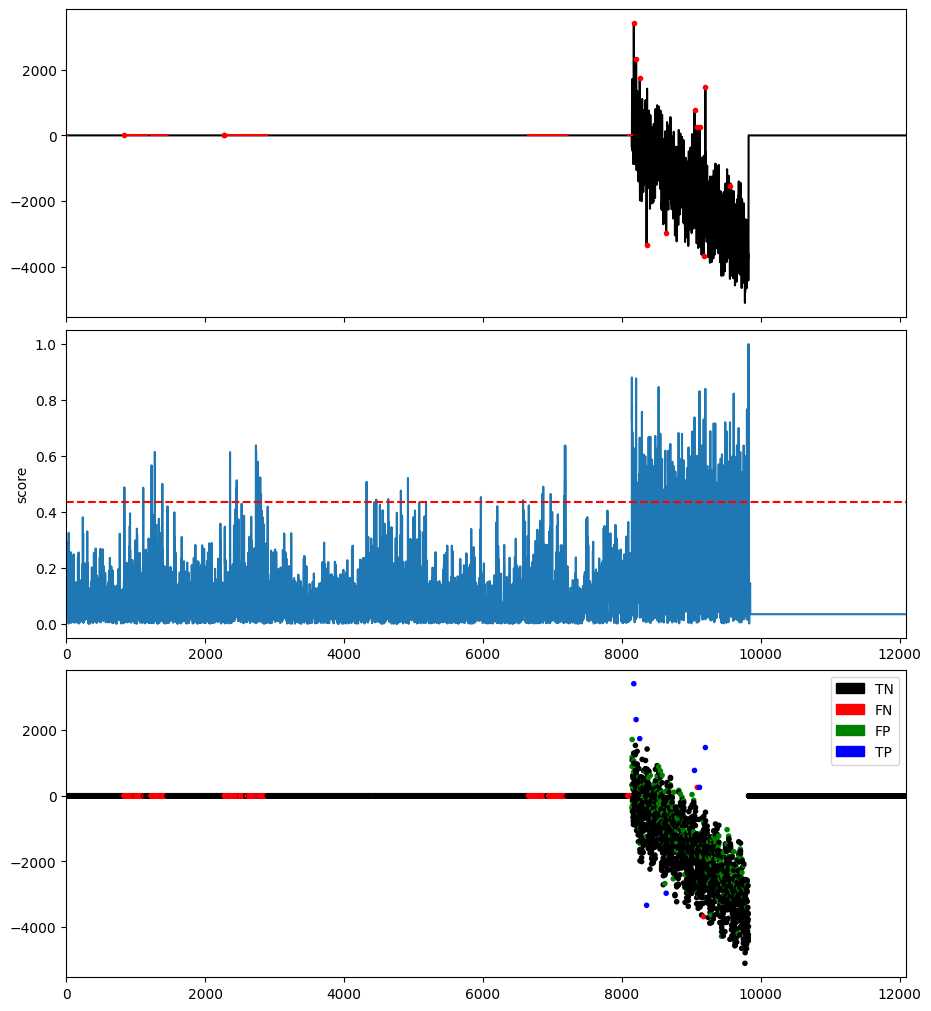

In [13]:
evaluate(score, data_3, labels_3, None, slidingWindow, None, predict=False)